# Visulaization of 911 Calls Data from Kaggle

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# Top 10 zip codes for making 911 calls

df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

In [6]:
# Top 10 townships for making 911 calls

df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

In [7]:
# total unique titles and top 10 titles

print('Total unique titles:',df['title'].nunique())

df['title'].value_counts().head(10)

Total unique titles: 110


Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

In [8]:
# Creating a new column which stores the reason of the call: the first part of the 'title column' like Traffic, EMS, Fire, etc

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

# displaying the number of calls with respect to reasons, in descending order

df['Reason'].value_counts().head()


EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

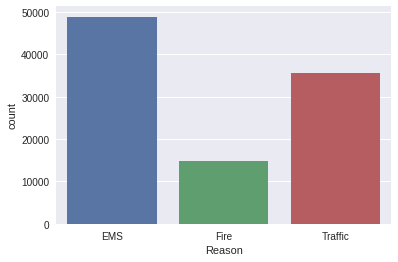

In [9]:
sns.countplot(df['Reason'], data = df)

In [10]:
# Converting timeStamp column to datetime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


# Extracting  months, days and hours from timestamp
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

# Displaying a few months,days and hours
print('Months:\n',df['Month'].head(3))
print('Days:\n',df['Day of Week'].head(3))
print('hour:\n',df['Hour'].head(3))

Months:
 0    12
1    12
2    12
Name: Month, dtype: int64
Days:
 0    3
1    3
2    3
Name: Day of Week, dtype: int64
hour:
 0    17
1    17
2    17
Name: Hour, dtype: int64


In [11]:
# As the week days are intenger, therefore mapping these with names by using dictionary

map_days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(map_days)

df['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

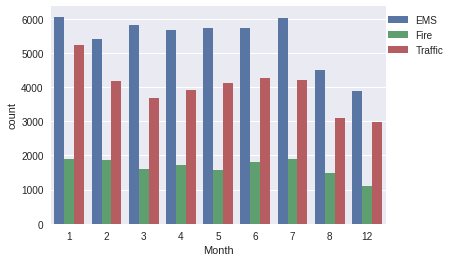

In [12]:
sns.countplot(x='Month', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.2,1))

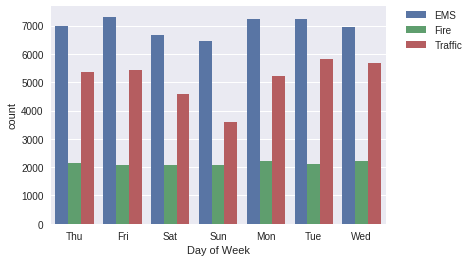

In [13]:
sns.countplot(x='Day of Week',data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

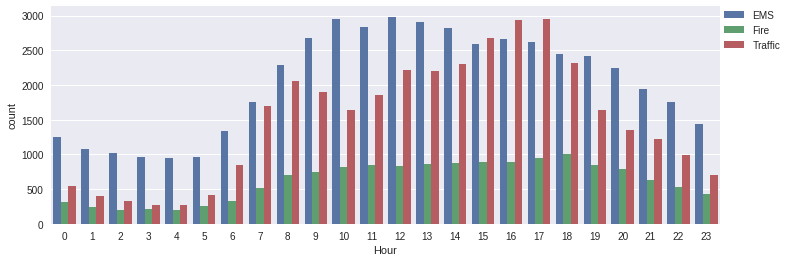

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(x='Hour',data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [15]:
df_month = df.groupby('Month').count()

df_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


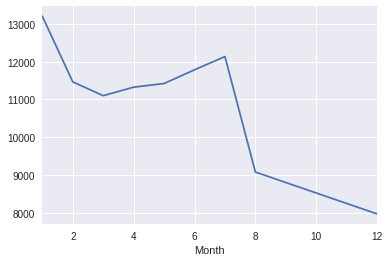

In [16]:
df_month['title'].plot()

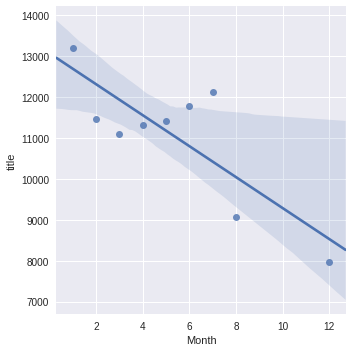

In [17]:
sns.lmplot(x='Month',y='title',data=df_month.reset_index())

In [18]:
# creating a new column date frm 'timeStamp'

df['Date'] = df['timeStamp'].apply(lambda time: time.date())

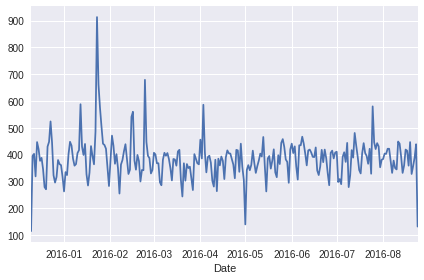

In [19]:
# Plotting counts of calls with repect to months
df_date = df.groupby('Date').count()
df_date['title'].plot()
plt.tight_layout()

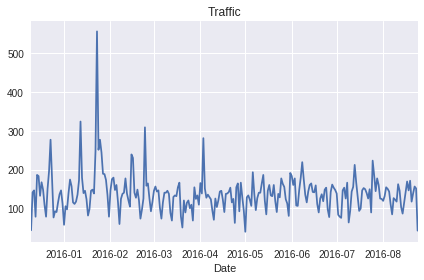

In [20]:
# Plotting the number of calls vs month, where reason for calling is 'Trafic'
df[df['Reason']=='Traffic'].groupby('Date').count()['title'].plot()
plt.title('Traffic')
plt.tight_layout()

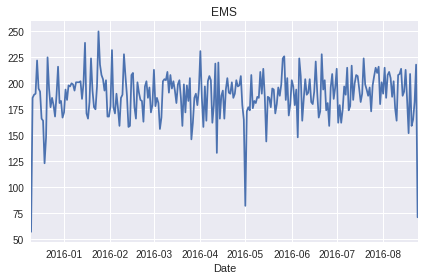

In [21]:
# Plotting the number of calls vs month, where reason for calling is 'EMS'
df[df['Reason']=='EMS'].groupby('Date').count()['title'].plot()
plt.title('EMS')
plt.tight_layout()

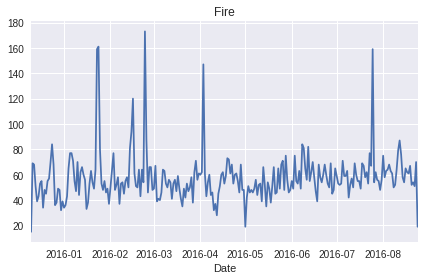

In [22]:
# Plotting the number of calls vs month, where reason for calling is 'Trafic'
df[df['Reason']=='Fire'].groupby('Date').count()['title'].plot()
plt.title('Fire')
plt.tight_layout()

In [31]:
df_dayAndMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
df_dayAndMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


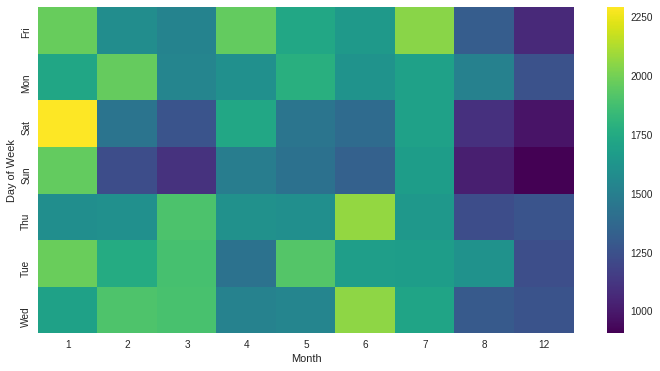

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(df_dayAndMonth,cmap='viridis')

/home/saif/.virtualenvs/mycvenv/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


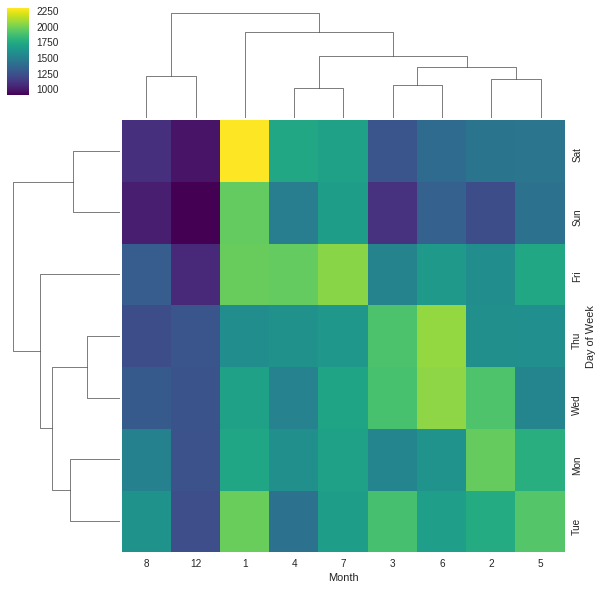

In [35]:
sns.clustermap(df_dayAndMonth,cmap='viridis')